<a href="https://colab.research.google.com/github/ernestoespo33/tirocinio/blob/main/Validation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Il presente notebook ha il compito di testare l'efficacia del modello predentemente trainato sulle immagini termiche delle mammelle

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import image
from matplotlib import pyplot
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import save_img


float32
(399, 404, 4)


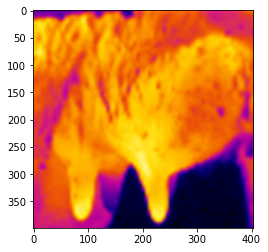

In [ ]:
image = plt.imread('nf13.png')


print(image.dtype)
print(image.shape)

plt.imshow(image)
plt.show()

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

After resizing: (128, 128, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>


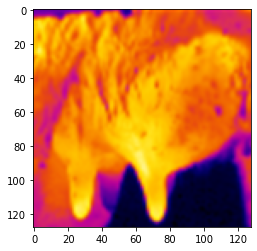

In [ ]:
input_image = tf.image.resize(image[:,:,:3], (128, 128))
pyplot.imshow(input_image)
print("After resizing:",input_image.shape, type(input_image))


Esegue un confronto tra i due modelli, quello trainato con il dataset colorato e quello trainato con il dataset in bianco e nero, caricando prima un modello e poi l'altro.

In [ ]:
model_COL = tf.keras.models.load_model('saved_model_COL/my_model')

In [ ]:
checkpoint_filepath = "training_COL/cp.ckpt"
best_model_COL = keras.models.load_model(checkpoint_filepath)

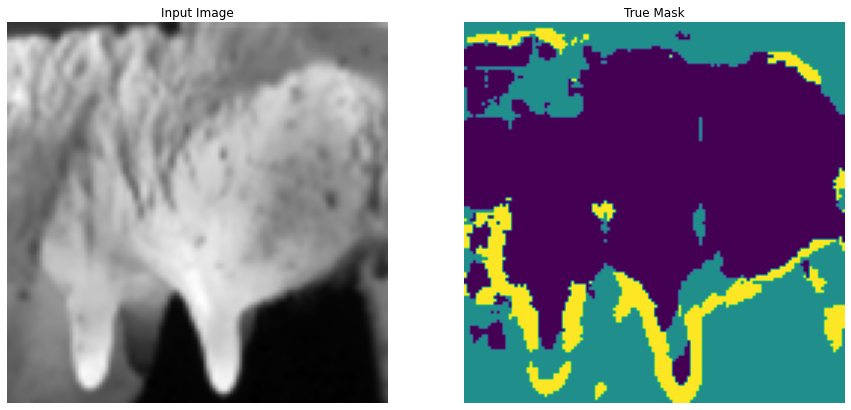

In [ ]:
input_image = tf.image.rgb_to_grayscale(input_image)
input_image = tf.image.grayscale_to_rgb(input_image)

pred_mask = best_model_COL.predict(np.reshape(input_image, (1,128,128,3)))
mask_bw = create_mask(pred_mask)
display([input_image, mask_bw])

mask_bw = tf.image.grayscale_to_rgb(mask_bw)
mask_out = array_to_img(mask_bw)
save_img('mask_COL.jpg', mask_out)

In [ ]:
model_BW = tf.keras.models.load_model('saved_model_BW/my_model')


In [ ]:
checkpoint_filepath = "training_BW/cp.ckpt"
best_model_BW = keras.models.load_model(checkpoint_filepath)


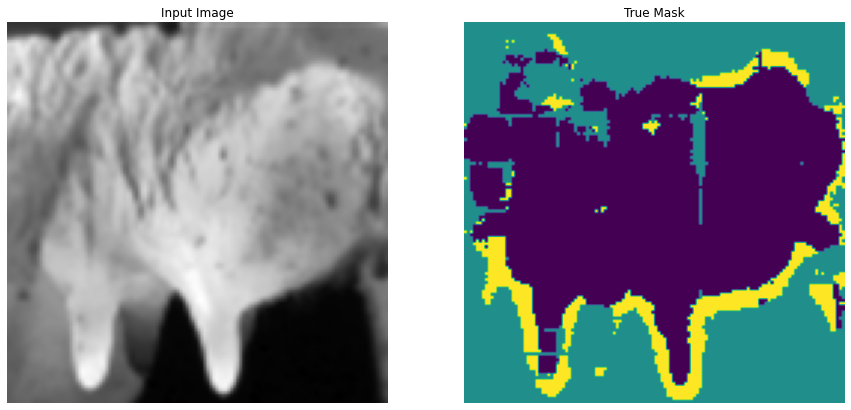

In [ ]:
pred_mask = best_model_BW.predict(np.reshape(input_image, (1,128,128,3)))
mask_bw = create_mask(pred_mask)
display([input_image, mask_bw])

mask_bw = tf.image.grayscale_to_rgb(mask_bw)
mask_out = array_to_img(mask_bw)
save_img('mask_BW.jpg', mask_out)